# Установка библиотек

In [1]:
import pandas as pd #для работы с таблицами

Для автоматического применения статистического критерия (теста) используется модуль `stats` библиотеки `scipy`.

Этот модуль содержит большое количество вероятностных распределений, корреляционные функции и статистические тесты и многое другое.

Также активно используется библиотека `statsmodels`

Для установки библиотеки `scipy` и `statsmodels` можно воспользоваться менеджером пакетов `pip`.

In [2]:
!pip install scipy

In [3]:
!pip install statsmodels


# Загрузка данных

Для скачивания данных используем команду `!wget`. 

Данные появятся в локальной директории.

Мы будем использовать информацию о диаметре пицц разных производителей.

In [4]:
!wget https://raw.githubusercontent.com/harika-bonthu/Hypothesis-test-examples/main/pizzas.csv

--2023-02-08 13:13:38--  https://raw.githubusercontent.com/harika-bonthu/Hypothesis-test-examples/main/pizzas.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 539 [text/plain]
Сохранение в: «pizzas.csv»

pizzas.csv          100%[===================>]     539  --.-KB/s    за 0s      

2023-02-08 13:13:38 (39,6 MB/s) - «pizzas.csv» сохранён [539/539]



Загрузим данные в память ноутбука.

In [5]:
data = pd.read_csv('pizzas.csv')

In [6]:
data.rename(columns={'Making Unit 1': 'Пиццерия №1', 'Making Unit 2': 'Пиццерия №2'}, inplace=True)

In [7]:
data.head()

,Пиццерия №1,Пиццерия №2
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


# Проверка данных на нормальность


In [8]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

Установим уровень значимости

In [9]:
alpha = 0.05

## Тест Шапиро-Уилка

In [10]:
from scipy.stats import shapiro

In [11]:
_, p = shapiro(data)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.204
Данные распределены нормально


## Тест Д’Агостино

In [12]:
from scipy.stats import normaltest

In [13]:
_, p = normaltest(data)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.251
Данные распределены нормально


# Независимый T-тест 

In [14]:
from scipy.stats import ttest_ind

In [15]:
H0 = 'Нет значимой разницы между диаметрами пиццы в разных пиццериях.'
Ha = 'Есть значимая разница между диаметрами пиццы в разных пиццериях.'

Зависимая переменная (диаметр пиццы) является количественной. Группы происходят из разных совокупностей. Следовательно, мы используем независимый T-тест.

In [16]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(data['Пиццерия №1'], data['Пиццерия №2'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(data)


*** Результаты независимого T-теста ***
0.47 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Нет значимой разницы между диаметрами пиццы в разных пиццериях.


-----

# Корреляция Спирмана 

In [48]:
from numpy.random import rand
from scipy.stats import spearmanr

data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)


corr, p = spearmanr(data1, data2)

In [65]:
print(corr,p)
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

0.14285714285714288 0.7599453002180929
0.7599453002180929 > 0.05. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.


# ANOVA тест

In [51]:
from scipy.stats import f_oneway

Однофакторный дисперсионный анализ ANOVA проверяет нулевую гипотезу о том, что две или более групп имеют одинаковое среднее значение генеральной совокупности.

В качестве данных возьмем информацию по размерам раковины мидий, выращенных в разных местах.

In [52]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [53]:
_, p = f_oneway(petersburg, magadan, tvarminne)

In [54]:
H0 = 'Нет значимой разницы между средним размером раковины мидий в трех разных местах.'
Ha = 'Есть значимая разница между средним размером раковины мидий в трех разных местах.'

In [55]:
if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.007870900547143829 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в трех разных местах.


_____

# Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


### Решение

Подгрузим необходимые библиотеки визуализации

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Сформируем датафрейм и посмотрим на него (5 баллов)

In [79]:
df = pd.DataFrame()
df['petersburg'] = petersburg
df['magadan'] = magadan[:-1]
df

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764


На первый взгляд корреляции здесь не много. Также посмотрим на графики данных и их распределений (отдельно от задания, просто визуально легче понять с какими данными мы имеем дело)

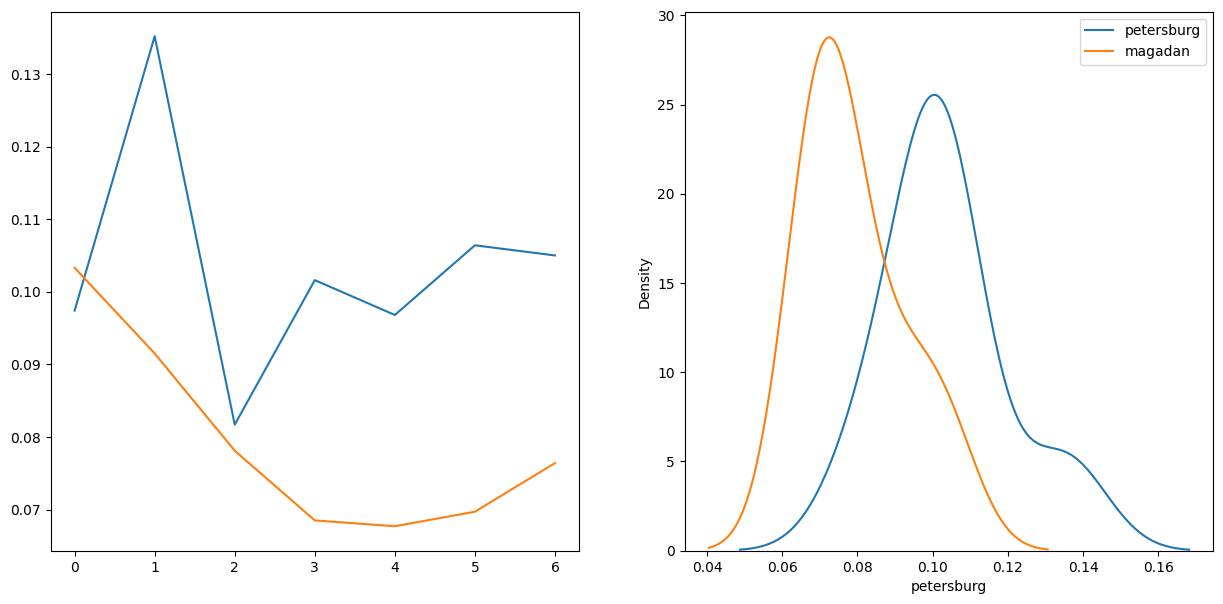

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].plot(df)
sns.kdeplot(df.petersburg, ax=ax[1], label='petersburg')
sns.kdeplot(df.magadan, ax=ax[1], label='magadan')
plt.legend()

И графики данных подтверждают, что явной линейной взаимосвязи между ними нет. А вот KDE-графики показывают распределение близкое к нормальному, но всё же с некоторыми отклонениями.

Теперь проверим предварительные выводы формальными статистическими методами.

Начнём с проверки данных на соответствие нормальному распределению для выбора метода проверки гипотезы корреляции между данными. Так как в данных меньше 8 сэплов, необходимых методу Д'Агостино для вычисление параметра искажения skew, воспользуемся методом Шапиро.

In [88]:
alpha = 0.05
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

Проверим данные в столбце petersburg

In [91]:
_, p = shapiro(df.petersburg)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.242
Данные распределены нормально


И в столбце magadan:

In [92]:
_, p = shapiro(df.magadan)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.133
Данные распределены нормально


Так как данные распределены нормально и не имеют явных выбросов, для проверки линейной скоррелированности между ними применим метод Пирсона (7 баллов)

Из документации функции scipy.stats.pearsonr следует, что она возвращает два параметра:
1. Значение корреляции;
2. Значение p-value для тестирования нулевой гипотезы о том, что два набора данных линейно не коррелируют.

In [94]:
from scipy.stats import pearsonr

alpha = 0.05
corr, p = pearsonr(df.petersburg, df.magadan)
H0 = "Два набора данных линейно нескоррелированы"
Ha = "Два набора данных линейно соррелированы"

In [96]:
print(f"Корреляция: {corr}, pvalue: {p}")
if p>alpha:
    print(f"pvalue({p}) > alpha({alpha}). {H0}. Гипотезу H0 Невозможно отвергуть.")
else:
    print(f"pvalue({p}) <= alpha({alpha}). {Ha}. Принимаем альтернативную гипотезу Ha")

Корреляция: 0.2550946857682129, pvalue: 0.580889581325423
pvalue(0.580889581325423) > alpha(0.05). Два набора данных линейно нескоррелированы. Гипотезу H0 Невозможно отвергуть.


Вывод: можем принять гипотезы о нормальном распределении и линейной нескоррелированности данных (5 баллов + 3 балла).

### Выбор метода сравнения

Осуществим выбор метода сравнения согласно рекомендациям, указанным в курсе:

<img src=./dst-eda-4-10.png>

Исходные данные для выбора:
* Распределение - нормальное;
* Зависимая переменная - количественная;
* Проводим тест на сравнение выборки
* Кочество сравниваемых групп: 2
* Обектов в выборке - 7 (меньше 30)

Так как зависимая переменная количественная, а данные происходят из
разных совокупностей, выбираем независимый t-тест (7 баллов).
Проведём его: 

In [105]:
H0 = 'Нет значимой разницы между размерами мидий, произведенных в разных регионах.'
Ha = 'Есть значимая разница между размерами мидий, произведенных в разных регионах.'

print("*** Результаты независимого T-теста ***")
test_results = ttest_ind(df.petersburg.values, df.magadan.values, equal_var=True)

p = round(test_results[1],2)

if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

*** Результаты независимого T-теста ***
0.01 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между размерами мидий, произведенных в разных регионах.


Тест на сравнение выборок проведен (7 баллов).

Выводы:
1. Распределение данных близко к нормальному;
2. Данные линейно нескоррелированы;
3. Есть значимая разница между размерами мидий, произведенных в разных регионах;
4. При построении модели машинного обучения предсказывающей размер мидий обязательно использовать в качестве одного из признаков место производства. Это даст хорошую дополнительную информацию и повысит точность модели.

(3 балла)

# Бонус

Скачаем датасет, содержащий информацию по давлению 120 человек.



In [1]:
!wget https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/brslood_pressure.csv

--2022-01-13 15:50:15--  https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/blood_pressure.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2851 (2.8K) [text/plain]
Saving to: ‘blood_pressure.csv’

blood_pressure.csv  100%[===================>]   2.78K  --.-KB/s    in 0s      

2022-01-13 15:50:15 (40.4 MB/s) - ‘blood_pressure.csv’ saved [2851/2851]



In [5]:
data = pd.read_csv('blood_pressure.csv')

In [6]:
print('Размер выборки: ', data.shape)

Размер выборки:  (120, 5)


In [7]:
data.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


## Z-тест

Проведем Z-тест для проверки двух независимых групп данных на равенство средних значений выборок.

In [8]:
from statsmodels.stats import weightstats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
_ ,p = weightstats.ztest(data['bp_before'], x2=data['bp_after'], value=0,alternative='two-sided')
print(float(p))


if p < 0.05:
    print("Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу об отсутсвии различий между данными.")

0.002162306611369422
Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.


## Z-тест на пропорцию

Z-критерий одной пропорции используется для сравнения наблюдаемой пропорции с теоретической.

В этом тесте используются следующие нулевые гипотезы:

$H_0: p = p_0$ (доля мужчин, предоставивших данные о своем давлении, равна гипотетической пропорции $p_0$)

Альтернативная гипотеза может быть двусторонней, левосторонней или правосторонней:

$H_1 (двусторонний): p ≠ p_0$ (доля мужчин не равна некоторому гипотетическому значению $p_0$)
$H_1 (левосторонний): p < p_0$ (доля мужчин меньше некоторого гипотетического значения $p_0$)
$H_1 (правосторонний): p > p_0$ (доля мужчин больше некоторого гипотетического значения $p_0$)

Предположим, что доля мужчин в нашем датачете равна 40%.

$p_0$: гипотетическая доля мужчин = 0.40

$x$: число мужчин в выборке мужчин: `len(data[data.sex == 'Male'])`

$n$: размер выборки = `len(data)`

Покажем, как использовать функцию `proportions_ztest` для выполнения  **z-теста**:

In [13]:
p_0 = 0.4
n = len(data)
x = len(data[data.sex == 'Male'])

print(n, x)

120 60


In [15]:
from statsmodels.stats.proportion import proportions_ztest

#perform one proportion z-test
_, p = proportions_ztest(count=x, nobs=n, value=p_0)

In [16]:
if p < 0.05:
    print("Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу.")

Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.
